<a href="https://colab.research.google.com/github/AnirudhJM24/myML/blob/main/watches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import numpy as np

In [169]:
import os

In [170]:
IMG_WIDTH=200
IMG_HEIGHT=200
test_folder=r'/content/drive/MyDrive/datasetz/images/'

In [171]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,0)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [172]:
img_data_array, class_name = create_dataset(r'/content/drive/MyDrive/datasetz/images')

In [173]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'x': 0, 'z': 1}

In [174]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]


In [175]:
from sklearn.model_selection import train_test_split

In [176]:
atrain,atest,btrain,btest = train_test_split(img_data_array,target_val,test_size=0.2)

In [177]:
atrain = np.array(atrain)

In [178]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30)

In [179]:
atrain = atrain.reshape(atrain.shape[0], -1)

In [180]:
rfc.fit(atrain,btrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [181]:
rfc.score(atrain,btrain)

0.9875

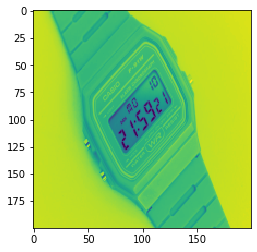

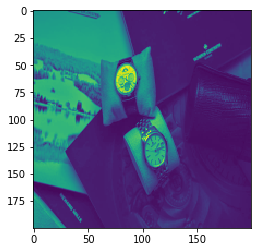

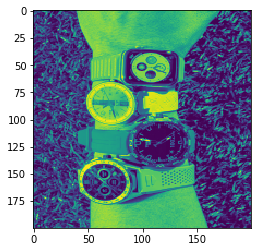

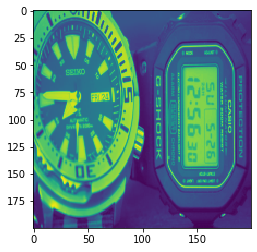

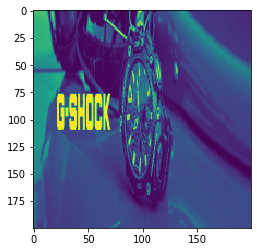

In [183]:
atest = np.array(atest)
%matplotlib inline
for z in atest[:5]:
  plt.imshow(z, interpolation='nearest')
  plt.show()


In [184]:
atest = atest.reshape(atest.shape[0], -1)

In [185]:
rfc.predict(atest)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])